-- CRISP-DM
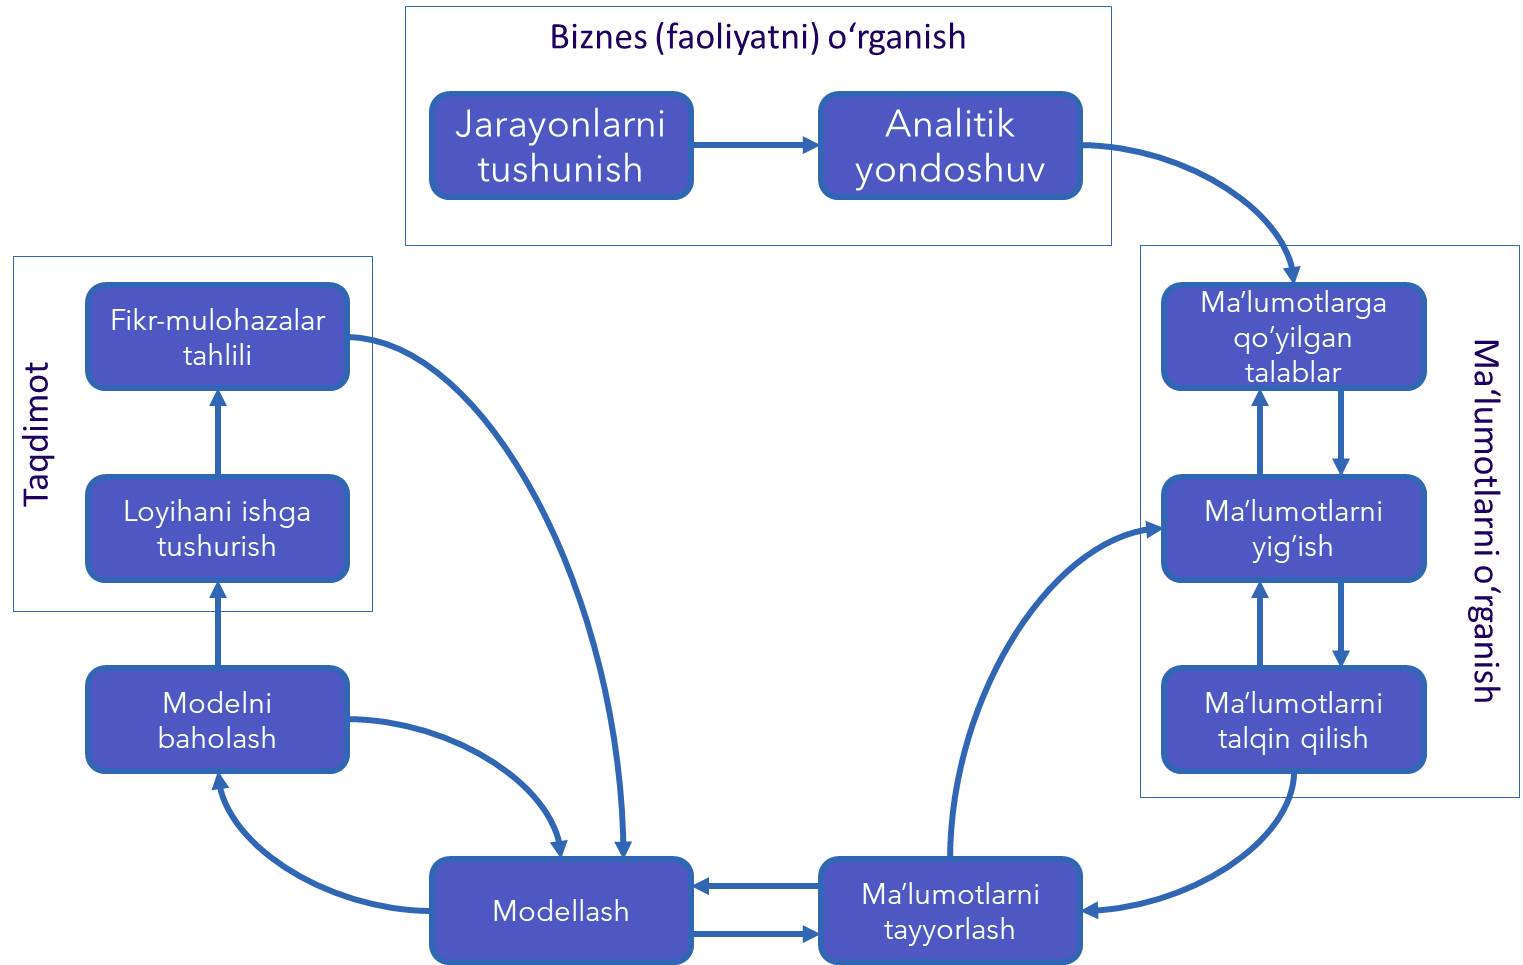

Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish: 
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


- 1) Birinchi bo'lib malumotlarni o'rganib chiqamiz

In [7]:
df.shape

(200, 4)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

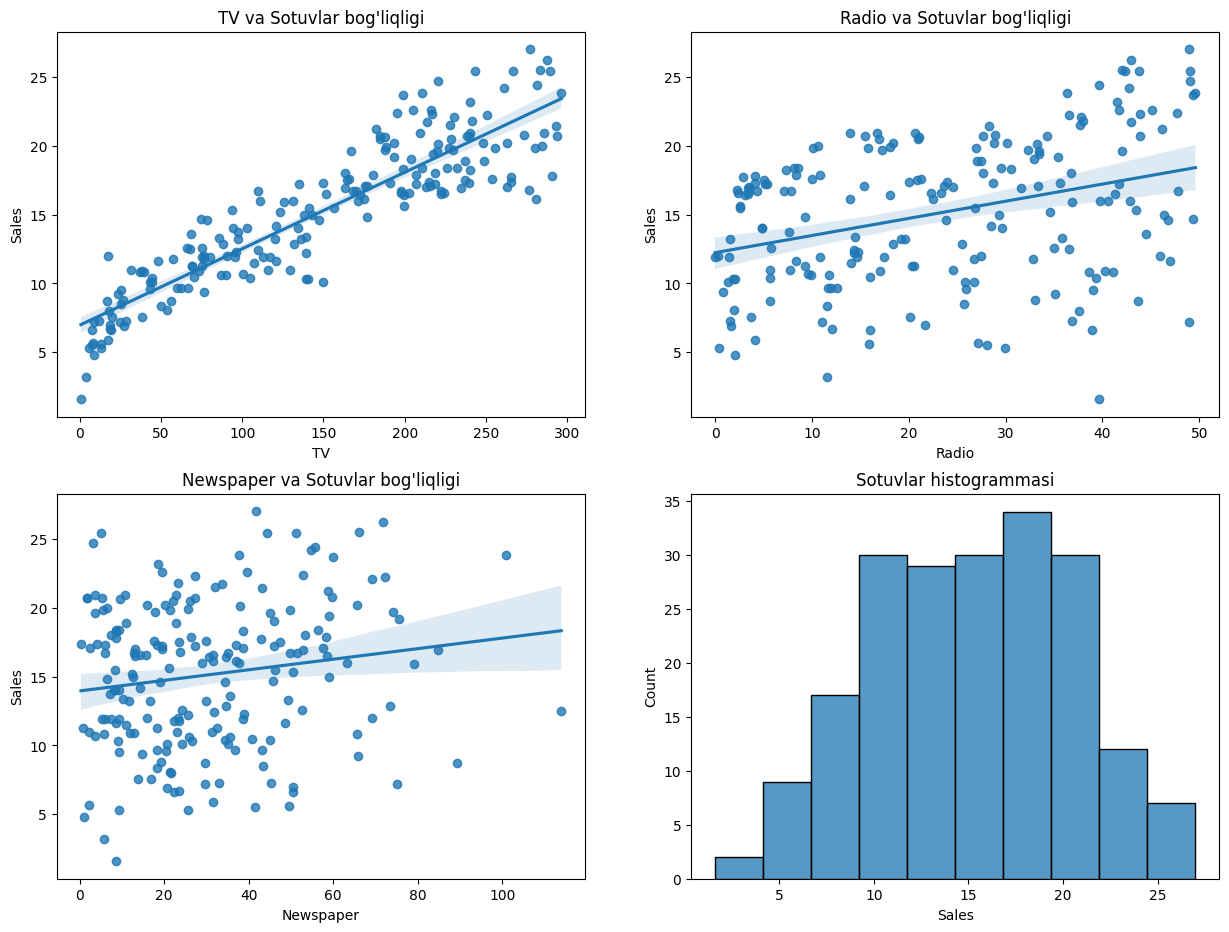

In [34]:
fig, ax = plt.subplots(2,2, figsize=(15,11))

sns.regplot(ax=ax[0,0], data=df, y="Sales", x="TV")
sns.regplot(ax=ax[0,1], data=df, y="Sales", x="Radio")
sns.regplot(ax=ax[1,0], data=df, y="Sales", x="Newspaper")
sns.histplot(ax=ax[1,1], data=df, x="Sales",)

ax[0,0].set_title("TV va Sotuvlar bog'liqligi")
ax[0,1].set_title("Radio va Sotuvlar bog'liqligi")
ax[1,0].set_title("Newspaper va Sotuvlar bog'liqligi")
ax[1,1].set_title("Sotuvlar histogrammasi")
plt.show()


In [20]:
df.corrwith(df["Sales"]).sort_values(ascending=False)


Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

Ko'rib turibmizki Sotuvlar hajmi TVda berilgan reklamalar bilan deyarli 90% bo'gliq ekan

In [29]:
from sklearn import linear_model

LR_model = linear_model.LinearRegression()

x_train  = np.asanyarray(train_set[["TV"]])
y_train  = np.asanyarray(train_set[["Sales"]])

LR_model.fit(x_train, y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

theta1=np.float64(0.055132630766939646)
theta0=np.float64(7.044916461655207)


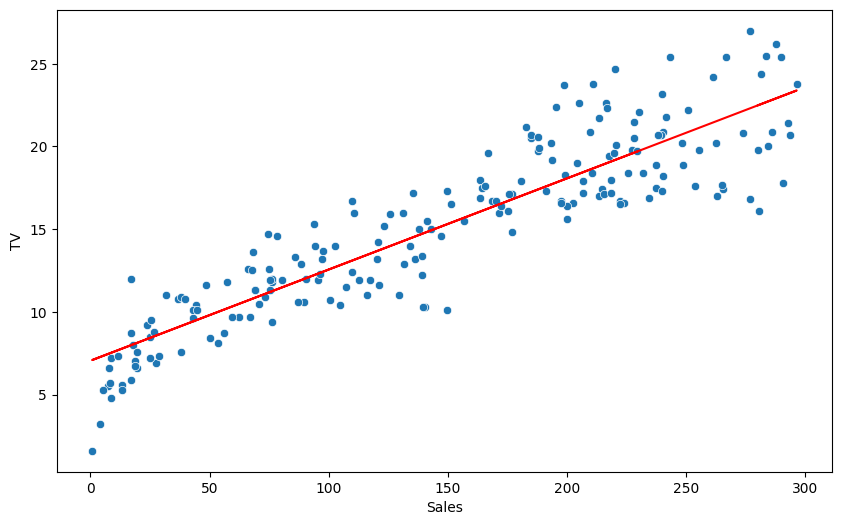

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='Sales', x='TV')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Sales")
plt.ylabel("TV")
plt.show()

In [70]:
x_test = np.asanyarray(test_set[["TV"]])
y_test = np.asanyarray(test_set[["Sales"]])


In [71]:
y_predict = LR_model.predict(x_test)


In [72]:
result = pd.DataFrame(
    {"keyingi":y_predict.flatten(),
    "Oldingi":y_test.flatten()}
)
result.index = test_set.index
result

,keyingi,Oldingi
95,16.048075,16.9
15,17.817833,22.4
30,23.193264,21.4
158,7.689968,7.3
128,19.190635,24.7
115,11.185377,12.6
69,18.997671,22.3
170,9.801548,8.4
174,19.306414,16.5
45,16.698640,16.1


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE  = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.037955356968122
RMSE=np.float64(2.5103822386472223)


In [69]:
test_set


,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7
115,75.1,35.0,52.7,12.6
69,216.8,43.9,27.2,22.3
170,50.0,11.6,18.4,8.4
174,222.4,3.4,13.1,16.5
45,175.1,22.5,31.5,16.1


68	237.4	27.5	11.0	18.9


In [68]:
test_set.loc[[68], ["TV"]] = 50
